# How can machine learning be applied to predict site viability scores for offshore basins?

In my second subquestion, I use a new dataset of potential offshore injection sites across the Gulf of Mexico from Wendt et al. (2022). 

# Import Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read in Data from Wendt et al. (2022)

First, I read in the data.

In [9]:
wendt = pd.read_csv('wendt_data.csv', skiprows=3)
wendt

,Grid FID,Grid ID,Longitude\n(degrees),Latitude\n(degrees),CO2 Source ID (tied to NATCARB dataset)*,Distance (km),CO2 Source ID (tied to NATCARB dataset),Distance (km).1,CO2 Source ID (tied to NATCARB dataset).1,Distance (km).2,...,Sum of Reservoir Quality W/O Depth (feet),New Injectivity,S1,S2,S3,S4,S1.1,S2.1,S3.1,S4.1
0,0,36663,-96.964053,26.000342,1671,56.265652,860,39.710421,286,127.205047,...,9.1271,12.3958,57.746243,NaN,38.572100,NaN,25-50%,NaN,25-50%,NaN
1,1,36668,-97.035537,26.071826,1671,50.940346,860,34.179635,286,117.880692,...,1.5259,1.7557,30.571945,NaN,16.120983,NaN,0-25%,NaN,0-25%,NaN
2,2,36669,-96.964053,26.071826,1671,57.783507,860,41.034622,286,124.718795,...,9.1271,12.3958,57.670181,NaN,38.559063,NaN,25-50%,NaN,25-50%,NaN
3,3,36670,-97.035537,26.143310,1671,53.574517,860,37.428918,286,115.740856,...,9.1271,12.3958,32.312887,NaN,14.222778,NaN,0-25%,NaN,0-25%,NaN
4,4,36671,-96.964053,26.143310,1671,60.118581,860,43.774470,286,122.694148,...,9.1271,12.3958,57.596115,NaN,38.506005,NaN,25-50%,NaN,25-50%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,2554,60802,-87.742585,29.717522,1205,90.932440,520,76.494158,1533,86.555143,...,9.9857,11.2027,30.814319,NaN,16.993804,NaN,0-25%,NaN,0-25%,NaN
2555,2555,60808,-87.742585,29.789007,1205,84.443641,520,68.570209,1533,79.735503,...,6.8179,5.9596,30.510465,NaN,15.706714,NaN,0-25%,NaN,0-25%,NaN
2556,2556,60864,-88.314459,30.217912,1497,27.789683,2459,17.932734,576,23.083298,...,3.0173,8.4316,53.280620,NaN,33.239677,NaN,25-50%,NaN,0-25%,NaN
2557,2557,60865,-88.242975,30.217912,1497,34.138032,3674,15.290775,576,20.378109,...,10.4977,13.0178,53.660471,NaN,34.577485,NaN,25-50%,NaN,0-25%,NaN


In [13]:
wendt.columns

Index(['Longitude\n(degrees)', 'Latitude\n(degrees)',
       'CO2 Source ID (tied to NATCARB dataset)*', 'Distance (km)',
       'CO2 Source ID (tied to NATCARB dataset)', 'Distance (km).1',
       'CO2 Source ID (tied to NATCARB dataset).1', 'Distance (km).2',
       'Caisson Platform', 'Fixed Platform', 'Well Protector Platform',
       'Pipeline', 'Fault', 'Salt dome', 'Shipping Route (w/5 MI Buffer)',
       'Shipping Route (w/10 mi Buffer)', 'Fault.1', 'Active Wells',
       'P&A Wells', 'Caisson Platform.1', 'Major Platform',
       'Well Protector Platform.1', 'Pipeline.1', 'Salt dome.1', 'EOR Wells',
       'Shipping Route (w/10 mi Buffer).1', 'Number of plays',
       '(SUM) Injectivity W Depth - (kh)',
       '(SUM) Quality W/O Depth - ([h x E]/[1,000 feet to reservoir bottom])',
       'Capacity per Grid - (million tonnes)', 'Water Depth - (feet)',
       'Average Calculated Water Depth - (feet)',
       '(SUM) Hydrocarbon Potential W/O Depth - ([h x So]/[1,000 feet to reser

# Data Cleaning
## Drop Grid Identifier Numbers

In [10]:
wendt = wendt.drop(columns = ['Grid ID', 'Grid FID'])

## Modify Data Type

The last 4 columns contain quartile information for the site score, which is currently stored as a string. I modify the data types to floats (0.25, 0.5, 0.75, 1) to represent the quartile bin and convert 'none' strings to NaN values. 

In [14]:
wendt['S1.1']

0       25-50%
1        0-25%
2       25-50%
3        0-25%
4       25-50%
         ...  
2554     0-25%
2555     0-25%
2556    25-50%
2557    25-50%
2558     0-25%
Name: S1.1, Length: 2559, dtype: object

To replace the column with float values, I extract the last digit in the bin using regular expressions. I store this as **viability_score_quartile**. I also merge this back to the original dataframe.

In [16]:
viability_score_quartile = wendt['S1.1'].str.extract(f'(\d+)%')
viability_score_quartile.columns = ['Viability_score_quartile']

In [18]:
wendt.merge(viability_score_quartile, left_index=True, right_index=True)

,Longitude\n(degrees),Latitude\n(degrees),CO2 Source ID (tied to NATCARB dataset)*,Distance (km),CO2 Source ID (tied to NATCARB dataset),Distance (km).1,CO2 Source ID (tied to NATCARB dataset).1,Distance (km).2,Caisson Platform,Fixed Platform,...,New Injectivity,S1,S2,S3,S4,S1.1,S2.1,S3.1,S4.1,Viability_score_quartile
0,-96.964053,26.000342,1671,56.265652,860,39.710421,286,127.205047,0,0,...,12.3958,57.746243,NaN,38.572100,NaN,25-50%,NaN,25-50%,NaN,50
1,-97.035537,26.071826,1671,50.940346,860,34.179635,286,117.880692,0,0,...,1.7557,30.571945,NaN,16.120983,NaN,0-25%,NaN,0-25%,NaN,25
2,-96.964053,26.071826,1671,57.783507,860,41.034622,286,124.718795,0,0,...,12.3958,57.670181,NaN,38.559063,NaN,25-50%,NaN,25-50%,NaN,50
3,-97.035537,26.143310,1671,53.574517,860,37.428918,286,115.740856,0,0,...,12.3958,32.312887,NaN,14.222778,NaN,0-25%,NaN,0-25%,NaN,25
4,-96.964053,26.143310,1671,60.118581,860,43.774470,286,122.694148,0,0,...,12.3958,57.596115,NaN,38.506005,NaN,25-50%,NaN,25-50%,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,-87.742585,29.717522,1205,90.932440,520,76.494158,1533,86.555143,0,0,...,11.2027,30.814319,NaN,16.993804,NaN,0-25%,NaN,0-25%,NaN,25
2555,-87.742585,29.789007,1205,84.443641,520,68.570209,1533,79.735503,0,0,...,5.9596,30.510465,NaN,15.706714,NaN,0-25%,NaN,0-25%,NaN,25
2556,-88.314459,30.217912,1497,27.789683,2459,17.932734,576,23.083298,0,0,...,8.4316,53.280620,NaN,33.239677,NaN,25-50%,NaN,0-25%,NaN,50
2557,-88.242975,30.217912,1497,34.138032,3674,15.290775,576,20.378109,0,0,...,13.0178,53.660471,NaN,34.577485,NaN,25-50%,NaN,0-25%,NaN,50


# Principal Component Analysis

Principal Component Analysis is a method of unsupervised machine learning which maximizes variance and important information from a table by creating principal components of a linear combination of features. This is typically performed on inter-correlated data with linearly dependent features. 

In order to perform PCA, I need to reorient the data to be a 2559 x 58 numpy array. I also only want to include the data, not the site scores and quartiles for a given scenario.

In [19]:
wendt.columns[-8:]

Index(['S1', 'S2', 'S3', 'S4', 'S1.1', 'S2.1', 'S3.1', 'S4.1'], dtype='object')

In [29]:
wendt_pca = wendt.iloc[:, :-8]
wendt_pca_arr = wendt_pca.to_numpy()
wendt_pca_arr.shape

(2559, 58)

Next, I calculate the mean and standard deviation across each column/feature in order to center and standardize the numpy array. This is essential in PCA because it prevents percieved feature importance due to size of numbers alone. This way, features are standardized accross different scales, allowing PCA to identify key features not considering conflated number values.

In [30]:
wendt_mean = np.mean(wendt_pca_arr, axis=0)
wendt_std = np.std(wendt_pca_arr, axis=0)
wendt_standardized = (wendt_pca_arr - wendt_mean) / wendt_std

PCA is an application of Singular Value Decomposition (SVD), so I perform SVD and save the resulting matrices. SVD does [], which will then be used to [].

In [31]:
u, s, vt = np.linalg.svd(wendt_standardized, full_matrices=False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (2559, 58)
1D List of diagonal elements of Sigma: [1.81479333e+02 1.40890587e+02 1.29904609e+02 9.08362762e+01
 9.02046059e+01 8.18919813e+01 7.90134409e+01 7.53663594e+01
 7.45665152e+01 6.92069343e+01 6.39427653e+01 5.92650405e+01
 5.41589899e+01 5.09088129e+01 5.01114413e+01 4.81300428e+01
 4.53491611e+01 4.40457679e+01 3.87414291e+01 3.66575773e+01
 3.56645572e+01 3.39847048e+01 3.28065057e+01 3.18979044e+01
 2.88514390e+01 2.58544655e+01 2.13379882e+01 2.04692452e+01
 1.99979313e+01 1.57800300e+01 1.56201962e+01 1.45043747e+01
 1.38395423e+01 1.27763389e+01 1.02554571e+01 9.11214394e+00
 6.34243279e+00 4.14822636e+00 3.91675162e-01 1.49938369e-04
 1.13685255e-04 7.85939065e-05 7.56138791e-05 7.03359953e-05
 6.73046042e-05 4.95069539e-05 4.74193190e-05 4.29965866e-05
 3.33158382e-05 1.92643262e-05 2.88201312e-14 1.45332609e-14
 1.23189140e-14 1.22658215e-14 1.19308481e-14 1.19308481e-14
 1.19308481e-14 1.19308481e-14]
Dimensions of V Transpose: (58, 58)


**u** is []. **s** is []. **vt** describes [].

Here, we confirm that the sum of the feature variances of the new matrix u is the same as the sum of the variance from the original, standardized matrix.

In [32]:
wendt_total_variance = (sum(s**2))/u.shape[0]

print("wendt_total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(wendt_total_variance, np.sum(np.var(wendt_standardized, axis=0))))

wendt_total_variance: 58.000 should approximately equal the sum of the feature variances: 58.000


Next, we matrix multiply **wendt_standardized** by **vt**, which [does this]. The [first two columns in this matrix are the first two principal components, ordered by maximum variance].

In [33]:
wendt_2d = wendt_standardized @ vt.transpose()[:, :2]
wendt_2d.shape

(2559, 2)

## Visualize Principal Components
Next, I plot the transformed data within the principal components within a 2d space. I create **score_category** using **viability_score_quartile** by extracting the first column. This is the quartile bin representing the site evaluation score. In order to visualize the PCA, I plot the transformed data using the first two principal components as the x and y axis and I color the data based on their score quartile classification **score_category**.

In [34]:
score_category = viability_score_quartile.iloc[:, 0].to_numpy()
score_category.shape

(2559,)

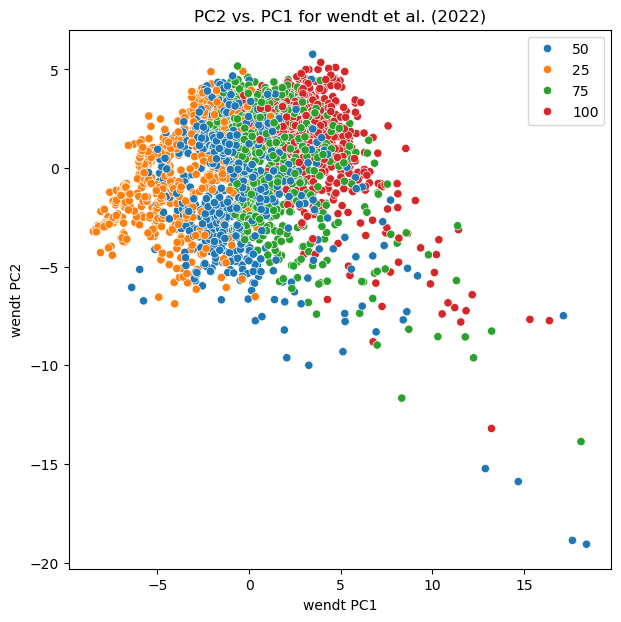

In [35]:
plt.figure(figsize = (7, 7))
plt.title("PC2 vs. PC1 for wendt et al. (2022)")
plt.xlabel("wendt PC1")
plt.ylabel("wendt PC2")
sns.scatterplot(x = wendt_2d[:, 0], y = wendt_2d[:, 1], hue = score_category);

Here, we can visualize the differences in space between lower and higher scoring sites, demonstrating that PCA is largely successful in separating different sites without these specific labels. Moving from left to right, sites score higher and higher, with the highest scoring sites on the far right. Although most sites are clumped together, many sites of differeng scores trail towards the bottom right, indicating an potential area of further analysis.
## PCA Analysis
To further determine the success of the PCA, I calculate the percent of total dataset variance captured by the first two principal components.

In [36]:
wendt_2d_variance = sum(np.var(wendt_2d, axis=0))/wendt_total_variance
wendt_2d_variance

0.3556407125920663

Only 36% of variance is captured using the first two principal components, demonstrating large variance loss.
## Scree Plot
Next, I create a Scree Plot to visualize the weight of each principal component.

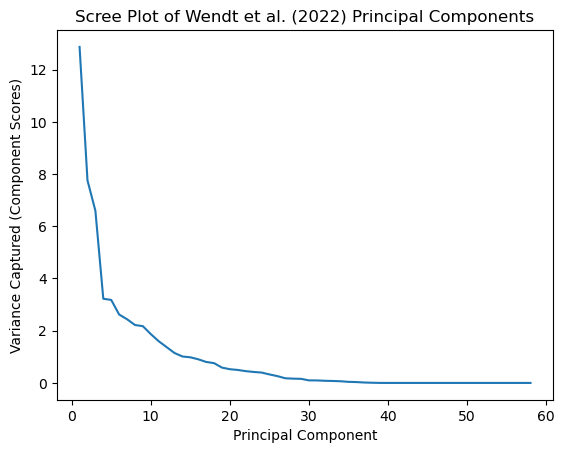

In [37]:
x= np.arange(1, 59)
y= s**2/len(wendt_pca_arr)
plt.plot(x, y)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured (Component Scores)')
plt.title('Scree Plot of Wendt et al. (2022) Principal Components') ;

Here, we can better vidualize the weighting of all principal components. It is clear that the first few principal components contribute to a majority of data variance. Despite 36% of total variance captured does not seem particularly high, when looking at all PC weighting, we can see that the first few are particularly beneficial.

Overall, this principal component analysis demonstrates high applications of unsupervised machine learning for CGS site valuation.

# 